In [1]:
import numpy as np
import pandas as pd

import os
import shutil
import io
import json
import zipfile
import cv2
from PIL import Image, ImageDraw

from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
mpl.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"]=False

In [ ]:
LABEL_ZIP_PATHS=[
    r"../../data/raw/training/labeling_data/T_labeling_data.zip",
    r"../../data/raw/validation/labeling_data/V_labeling_data.zip"
]

In [3]:
# 성별 매핑
sex_Male_list=["GF", "F", "S", "S1", "S2", "S3", "S4"]
sex_Female_list=["GM", "M", "D", "D1", "D2", "D3", "D4"]

In [ ]:
# 나이 매핑
def get_age_class(age):
    age=int(age)
    if age < 10:
        return "0s"
    elif age < 20:
        return "10s"
    elif age < 30:
        return "20s"
    elif age < 40:
        return "30s"
    elif age < 50:
        return "40s"
    elif age < 60:
        return "50s"
    else:
        return "60+"

In [5]:
csv_rows=[]

for LABEL_ZIP_PATH in LABEL_ZIP_PATHS:
    with zipfile.ZipFile(LABEL_ZIP_PATH, "r") as label_zip:
        json_names=[name for name in label_zip.namelist() if name.endswith(".json")]

        for json_name in tqdm(json_names, desc=os.path.basename(LABEL_ZIP_PATH)):
            try:
                json_data=json.load(io.TextIOWrapper(label_zip.open(json_name), encoding="utf-8"))
                member=json_data["member"][0]

                personal_sex=member["personal_id"].upper()
                if personal_sex in sex_Male_list:
                    sex="male"
                elif personal_sex in sex_Female_list:
                    sex="female"
                else:
                    print("일치하는 성별이 없습니다!")
                    continue
                age_class = get_age_class(member["age"])
                filename = json_data["filename"]
                
                row = {
                    "filename": filename,
                    "male": 1 if sex == "male" else 0,
                    "female": 1 if sex == "female" else 0,
                    "0s": 1 if age_class == "0s" else 0,
                    "10s": 1 if age_class == "10s" else 0,
                    "20s": 1 if age_class == "20s" else 0,
                    "30s": 1 if age_class == "30s" else 0,
                    "40s": 1 if age_class == "40s" else 0,
                    "50s": 1 if age_class == "50s" else 0,
                    "60+": 1 if age_class == "60+" else 0
                }

                csv_rows.append(row)

            except Exception as e:
                print(f"{json_name}에서 에러발생: {e}")
                continue

V_labeling_data.zip: 100%|██████████| 3200/3200 [00:00<00:00, 7372.39it/s]


In [ ]:
df=pd.DataFrame(csv_rows)
df.to_csv("../../data/processed/02_processed_data/ALL_labels.csv", index=False)
print(f"저장완료! 총 라벨 수: {len(df)}개")

저장완료! 총 라벨 수: 44151개


In [ ]:
df=pd.read_csv("../../data/processed/02_processed_data/ALL_labels.csv")
df

,filename,male,female,0s,10s,20s,30s,40s,50s,60+
0,F0001_IND_D_18_-45_01.JPG,0,1,0,1,0,0,0,0,0
1,F0001_IND_D_18_-45_02.JPG,0,1,0,1,0,0,0,0,0
2,F0001_IND_D_18_-45_03.JPG,0,1,0,1,0,0,0,0,0
3,F0001_IND_D_18_-45_04.JPG,0,1,0,1,0,0,0,0,0
4,F0001_IND_D_18_-90_01.JPG,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44146,F0900_IND_M_57_0_02.JPG,0,1,0,0,0,0,0,1,0
44147,F0900_IND_M_57_45_01.JPG,0,1,0,0,0,0,0,1,0
44148,F0900_IND_M_57_45_02.JPG,0,1,0,0,0,0,0,1,0
44149,F0900_IND_M_57_90_01.JPG,0,1,0,0,0,0,0,1,0


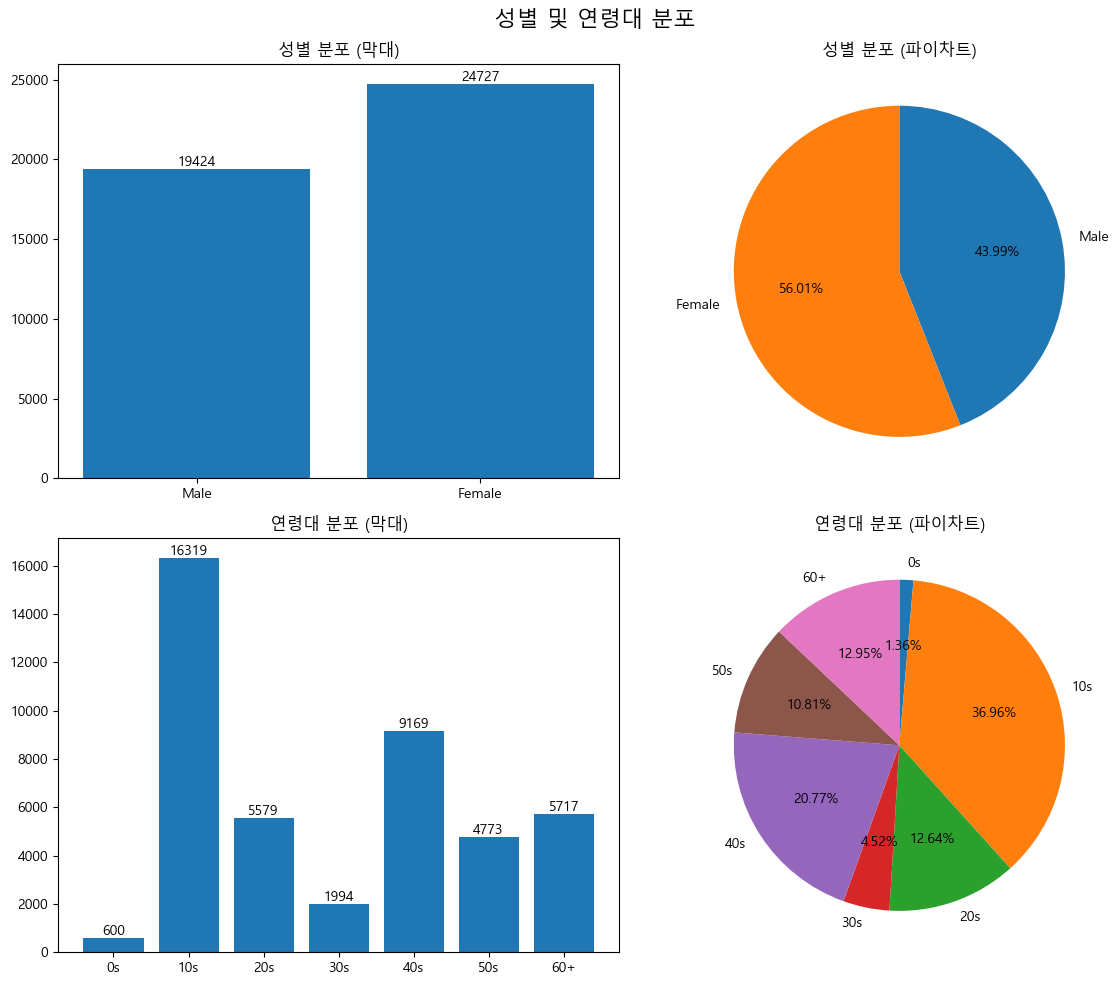

In [8]:
gender_labels = ["Male", "Female"]
gender_counts = [df["male"].sum(), df["female"].sum()]
age_classes = ["0s", "10s", "20s", "30s", "40s", "50s", "60+"]
age_counts = [df[age_class].sum() for age_class in age_classes]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("성별 및 연령대 분포", fontsize=16)

# 성별
bars_gender = axs[0, 0].bar(gender_labels, gender_counts)
axs[0, 0].bar_label(bars_gender)
axs[0, 0].set_title("성별 분포 (막대)")
axs[0, 1].pie(gender_counts, labels=gender_labels, autopct="%1.2f%%", startangle=90, counterclock=False)
axs[0, 1].set_title("성별 분포 (파이차트)")

# 연령대
bars_age = axs[1, 0].bar(age_classes, age_counts)
axs[1, 0].bar_label(bars_age)
axs[1, 0].set_title("연령대 분포 (막대)")
axs[1, 1].pie(age_counts, labels=age_classes, autopct="%1.2f%%", startangle=90, counterclock=False)
axs[1, 1].set_title("연령대 분포 (파이차트)")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
from tqdm import tqdm

In [ ]:
# label
df=pd.read_csv("../../data/processed/02_processed_data/ALL_labels.csv")
filenames=df["filename"].tolist()

# zip
zip_paths = [
    r"../../data/raw/training/image_data/T_image_data.zip",
    r"../../data/raw/validation/image_data/V_image_data.zip"
]
zip_files = [zipfile.ZipFile(p, 'r') for p in zip_paths]

# 파일 이름 -> zip 객체 맵핑
zip_map = {
    zfp.filename.split("/")[-1]: zf
    for zf in zip_files
    for zfp in zf.filelist
}

# 출력 폴더 생성
output_dir="../../data/processed/02_processed_data/resized_images"
os.makedirs(output_dir, exist_ok=True)

In [22]:
# 이미지 크기 224x224
image_size = (224, 224)

for fname in tqdm(filenames):
    zf=zip_map.get(fname)
    if zf is None:
        continue
    try:
        img_data=zf.read(fname)
        image=Image.open(io.BytesIO(img_data)).convert("RGB")
        image=image.resize(image_size)
        image.save(os.path.join(output_dir, fname))
    except Exception as e:
        print(f"{fname}에서 에러발생: {e}")

100%|██████████| 44151/44151 [1:21:02<00:00,  9.08it/s] 


이제 다시 colab으로!

In [23]:
# class ZipImageDataGenerator(Sequence):
#     # keras 모델 학습용 zip 이미지 데이터 생성기
#     # zip 파일에서 이미지들을 직접 메모리로 읽고 증강해서 배치 단위로 반환
#     def __init__(self, dataframe, zip_paths, batch_size, image_size, columns, augmentor=None, shuffle=True):
#         self.df=dataframe.reset_index(drop=True)  # ALL_labels.csv와 같은 데이터프레임
#         self.zip_paths=zip_paths  # 이미지가 담긴 zip 파일 경로 리스트
#         self.batch_size=batch_size  # 한 번에 불러올 이미지 수
#         self.image_size=image_size  # (width, height) 형식의 이미지 크기
#         self.columns=columns  # ['male', '10s', '20s', ...] 이런 y값 컬럼 목록
#         self.augmentor=augmentor  # ImageDataGenerator 객체 (증강용)
#         self.shuffle=shuffle  # 에폭 끝날 때마다 데이터 섞을지 여부
#         self.on_epoch_end()  # 처음에 shuffle
        
#         self.zip_files=[zipfile.ZipFile(p, 'r') for p in zip_paths]  # 모든 zip 파일 열기
#         # zip 내부 파일명을 키로, 어떤 zip에 있는지 빠르게 찾을 수 있도록 맵핑
#         self.zip_map={
#             zfp.filename.split("/")[-1]: zf
#             for zf in self.zip_files
#             for zfp in zf.filelist
#         }

#     def __len__(self):
#         return int(np.ceil(len(self.df) / self.batch_size))  # 에폭당 배치 수 계산(전체 데이터 수 / 배치 크기)

#     def __getitem__(self, idx):
#         batch=self.df.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]  # 배치 단위로 데이터 가져오기
#         images=[]
#         labels=[]

#         for _, row in batch.iterrows():
#             img_name=row['filename']  # 이미지 파일명
#             label=row[self.columns].values.astype(np.float32)  # multi-label y값

#             # zip에서 이미지 읽기
#             zf = self.zip_map.get(img_name)
#             if zf is None:
#                 continue  # zip에 없으면 skip
#             for zip_file in self.zip_files:
#                 try:
#                     img_data = zip_file.read(img_name)
#                     break
#                 except KeyError:
#                     continue

#             # 이미지 열기 -> RGB로 변환 -> 크기 조정 -> numpy 배열로 변환(정규화 -> for keras)
#             image=Image.open(io.BytesIO(img_data)).convert("RGB")
#             image=image.resize(self.image_size)
#             image=np.array(image) / 255.0  # rescale
            
#             # 증강 적용
#             if self.augmentor:
#                 image = self.augmentor.random_transform(image)

#             images.append(image)
#             labels.append(label)

#         return np.array(images), np.array(labels)

#     # epoch 끝날 때마다 셔플 여부
#     def on_epoch_end(self):
#         if self.shuffle:
#             self.df = self.df.sample(frac=1).reset_index(drop=True)

In [24]:
# df=pd.read_csv("./ALL_labels.csv")
# columns=["male", "female", "0s", "10s", "20s", "30s", "40s", "50s", "60+"]

In [25]:
# train, test=train_test_split(df, test_size=0.2, random_state=42)  # train/test
# train, val=train_test_split(train, test_size=0.2, random_state=42)  # train/val
# print(train.shape, val.shape, test.shape)

In [26]:
# zip_paths=[
#     r"./1. Training/T_image_data/T_image_data.zip",
#     r"./2. Validation/V_image_data/V_image_data.zip"
# ]

In [27]:
# # 증강 도구 생성
# augmentor=ImageDataGenerator(
#     brightness_range=[0.3, 1.0],
#     zoom_range=0.3
# )

In [28]:
# train_generator=ZipImageDataGenerator(
#     dataframe=train,
#     zip_paths=zip_paths,
#     batch_size=16,
#     image_size=(224, 224),
#     columns=columns,
#     augmentor=augmentor,  # 증강은 train만 적용
#     shuffle=True
# )

In [29]:
# val_generator=ZipImageDataGenerator(
#     dataframe=val,
#     zip_paths=zip_paths,
#     batch_size=16,
#     image_size=(224, 224),
#     columns=columns,
#     augmentor=None,  # val은 증강 없음
#     shuffle=False
# )

In [30]:
# test_generator = ZipImageDataGenerator(
#     dataframe=test,
#     zip_paths=zip_paths,
#     batch_size=16,
#     image_size=(224, 224),
#     columns=columns,
#     augmentor=None,  # 증강 필요 없음 (평가용이니까)
#     shuffle=False
# )